In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
path = "../data/data.csv"
data = pd.read_csv(path)
data["date"] = pd.to_datetime(data["date"])  # Convert column to datetime

# Example data
data.head()

,date,title,artist,song_id,link
0,2024-12-08 19:02:00,One More Hour,Tame Impala,0mO6oS60RST2sWmN2FKknP,https://open.spotify.com/track/0mO6oS60RST2sWm...
1,2024-12-08 19:04:00,Journey To The Real World,Tame Impala,43evTNhnbi70nlOVZ8Q5sK,https://open.spotify.com/track/43evTNhnbi70nlO...
2,2024-12-08 19:12:00,Let It Happen,Tame Impala,2X485T9Z5Ly0xyaghN73ed,https://open.spotify.com/track/2X485T9Z5Ly0xya...
3,2024-12-08 19:15:00,Feels Like We Only Go Backwards,Tame Impala,0LtOwyZoSNZKJWHqjzADpW,https://open.spotify.com/track/0LtOwyZoSNZKJWH...
4,2024-12-08 19:18:00,It Almost Worked,TV Girl,4NUhcsz9E1LrBe8nXLZqzp,https://open.spotify.com/track/4NUhcsz9E1LrBe8...


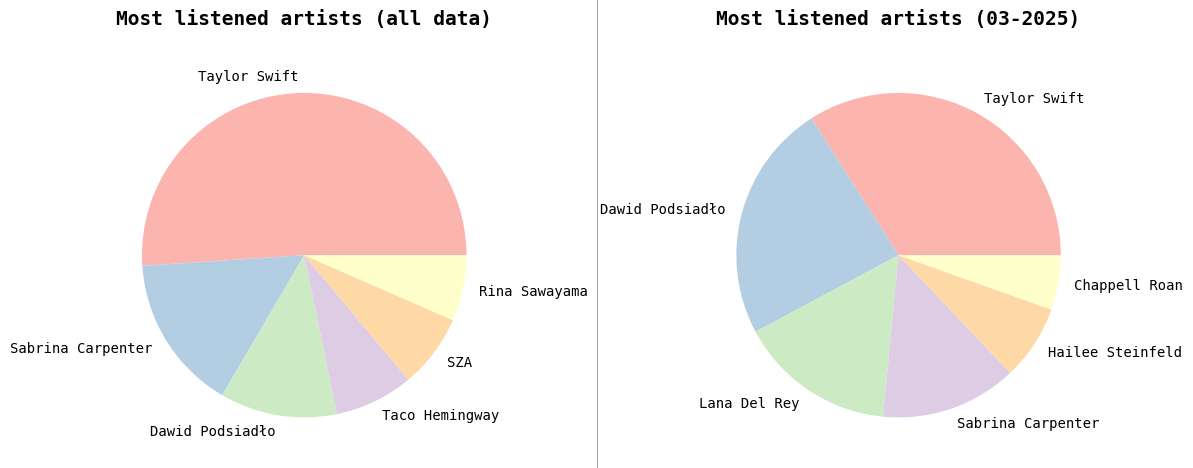

In [ ]:
num_of_artists = 6  # How many top artists should show up on the graph
month = date.today().month  # Displays the data for this month (1-12)
year = date.today().year  # Displays the data for this year


def most_listened_artists_chart(df, num_of_artists, ax=None, month=None, year=None):
    if month is not None and year is not None:
        df = df[(df["date"].dt.month == month) & (df["date"].dt.year == year)]

    df = df[["artist", "title"]].groupby(by="artist").count()  # Group the data by artist and get the count
    df.rename(columns={"title": "count"}, inplace=True)  # Rename the column to count
    df = df.sort_values(by="count", ascending=False)  # Sort by count descending
    df = df.head(num_of_artists)  # Get the top most listened artists

    listening_count = df["count"]
    labels = df.index

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.pie(
        x=listening_count, 
        labels=labels,
        textprops={"fontsize": 10, "family": "monospace"},
        colors=sns.color_palette("Pastel1")
    )

    date_range = f"{month:02}-{year}" if (month and year) else "all data"
    ax.set_title(
        f"Most listened artists ({date_range})",
        fontdict={"fontsize": 14, "fontweight": "bold", "family": "monospace"},
        pad=20
    )


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

most_listened_artists_chart(data, num_of_artists, ax=axes[0])
most_listened_artists_chart(data, num_of_artists, ax=axes[1], month=month, year=year)

# Add a vertical line separator
plt.plot([0.5, 0.5], [0, 1], color="grey", lw=0.5, transform=plt.gcf().transFigure, clip_on=False)

plt.tight_layout()
plt.show()